<a href="https://colab.research.google.com/github/DanzThing/danzthing.github.io/blob/main/Reach%20Analysis%20(Instagram).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
#importing necessay libraries and dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveRegressor

data = pd.read_csv('data.csv', encoding='latin1')
print(data.head())

   Impressions  From Home  From Hashtags  From Explore  From Other  Saves  \
0         3920       2586           1028           619          56     98   
1         5394       2727           1838          1174          78    194   
2         4021       2085           1188             0         533     41   
3         4528       2700            621           932          73    172   
4         2518       1704            255           279          37     96   

   Comments  Shares  Likes  Profile Visits  Follows  \
0         9       5    162              35        2   
1         7      14    224              48       10   
2        11       1    131              62       12   
3        10       7    213              23        8   
4         5       4    123               8        0   

                                             Caption  \
0  Here are some of the most important data visua...   
1  Here are some of the best data science project...   
2  Learn how to train a machine learni

In [6]:
#Dropping null values
data = data.dropna()

#Understanding the data type of all collumns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Impressions     119 non-null    int64 
 1   From Home       119 non-null    int64 
 2   From Hashtags   119 non-null    int64 
 3   From Explore    119 non-null    int64 
 4   From Other      119 non-null    int64 
 5   Saves           119 non-null    int64 
 6   Comments        119 non-null    int64 
 7   Shares          119 non-null    int64 
 8   Likes           119 non-null    int64 
 9   Profile Visits  119 non-null    int64 
 10  Follows         119 non-null    int64 
 11  Caption         119 non-null    object
 12  Hashtags        119 non-null    object
dtypes: int64(11), object(2)
memory usage: 12.2+ KB


<ipython-input-11-7cd0879d984f>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['From Home'])


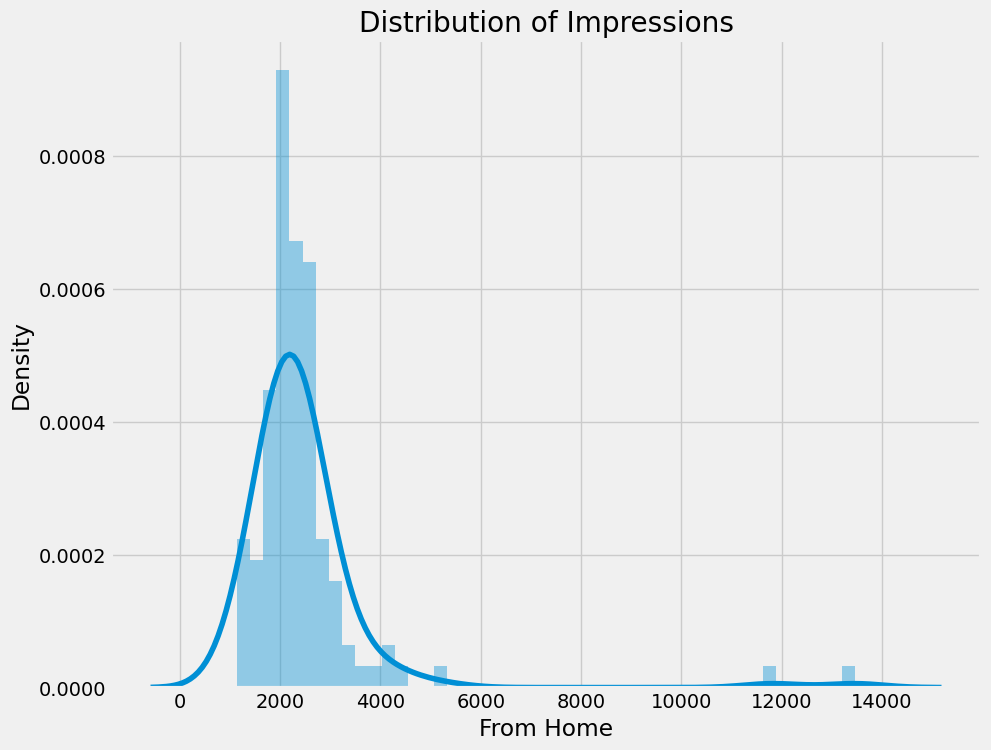

In [11]:
##Analyzing Instagram Reach

#Distribution of impressions receive form home
plt.figure(figsize=(10,8))
plt.style.use('fivethirtyeight')
plt.title('Distribution of Impressions')
sns.distplot(data['From Home'])
plt.show()

**Hashtags** on Instagram help us categorise our posts so they can be easily found by people interested in similar content. By using relevant hashtags, we can increase out reach and connect with widder audience, including new users who are actively search for specific topics.

<ipython-input-12-3461ec84008d>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['From Explore'])


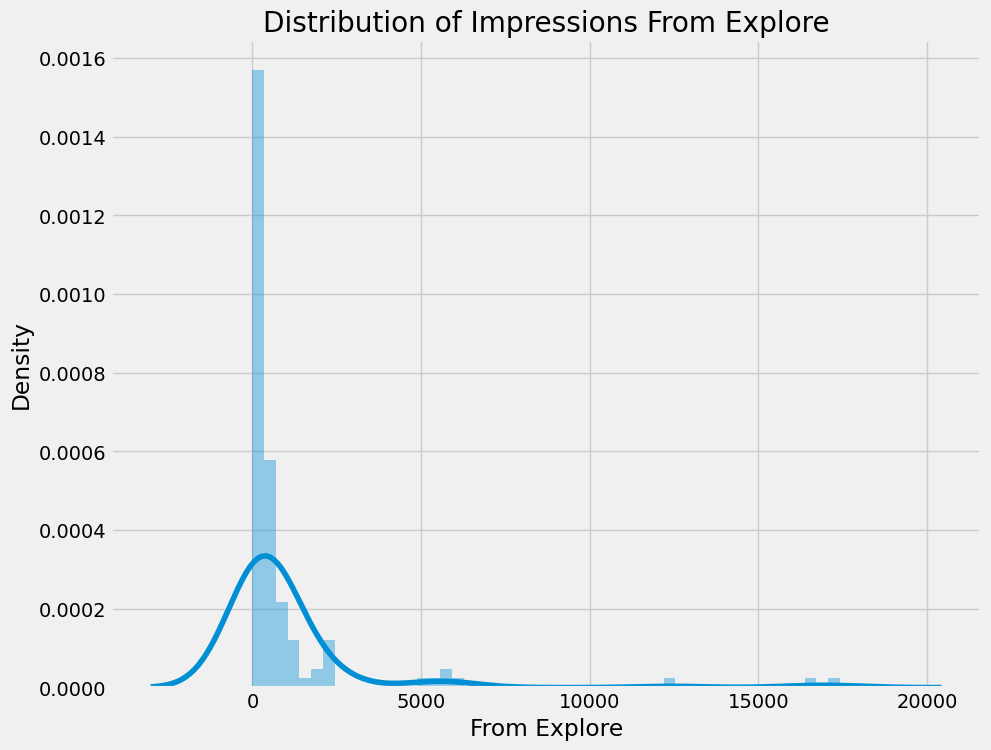

In [12]:
plt.figure(figsize=(10, 8))
plt.title("Distribution of Impressions From Explore")
sns.distplot(data['From Explore'])
plt.show()

From analyzing instagram impressions, it seems the Explore section isn't recommending your posts as frequently as desired. While some posts have gained traction there, the overall reach from Explore is noticeably lower than what you've achieved throgh hashtags. This suggests that Instagram's recommendation algorithm might not be prioritizing your content for a wider audience in the Explore section.

However, it's important to remember that the Explore algorithm is complex and contantly evolving. Factors such as engagement rate, content quality, and relevance to users' interests all play a role in determining which posts get featured.

To improve your reach on Explore,focus on creating high-quality, engaging content that aligns with your target audience's interests. You could also experiment with different posting times and formats to see what resonates best.

Remeber, building a strong presence on Explore takes time and consistent effort. Keep refininf your content strategy and stay engaged with your audience, and you may see your reach on Explore gradually increase.

In [13]:
#Percentage of impression from other sources
home = data["From Home"].sum()
hashtags = data["From Hashtags"].sum()
explore = data["From Explore"].sum()
other = data["From Other"].sum()

labels = ['From Home', 'From Hashtags', 'From Explore', 'Other']
values = [home, hashtags, explore, other]

fig = px.pie(data, values=values, names=labels,
             title='Impression on Instagram Posts From Various Sources', hole=.5)

fig.show()

Based on the donut plot illustrates that a significant portion of the reach, nearly half, originates from exisiting followers. Hashtags contribute considerably to the reach, accounting for 38.1%, highlighting their importance in expanding audience engagement. The Explore section also plays role, driving 9.14% of the reach, while other unspecified sources account for the remaining 3.01%.

This data underscores the value of hashtags in reaching new audiences in the platform, complementing the reach from one's existing follower base.

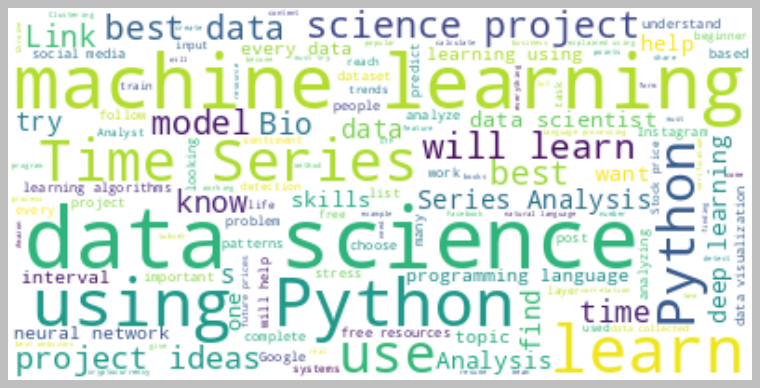

In [15]:
#Wordcloud of most used words in caption
text = " ".join(i for i in data.Caption)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.style.use('classic')
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

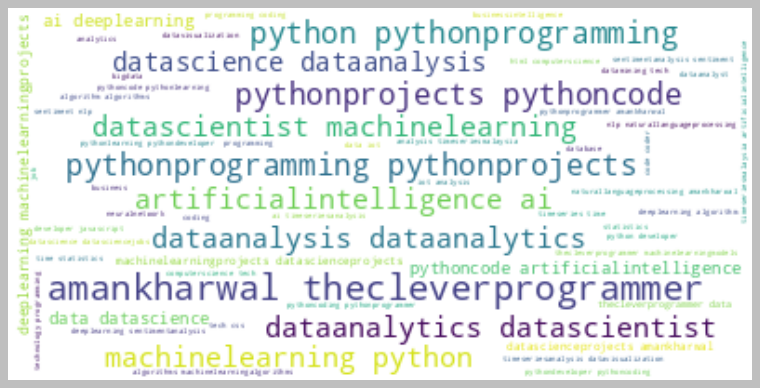

In [17]:
#Wordcloud of most used hashtags
text = "".join(i for i in data.Hashtags)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [19]:
## Analyzing Relationships

#Relationship between number of likes and impressions
figure = px.scatter(data_frame = data, x="Impressions",
                    y="Likes", size="Likes", trendline="ols",
                    title = "Relationship Between Like and Impressions")
figure.show()

The number of likes and the reach a post gets on Instagram tend to increase or decrease together in a predictable way.

In [21]:
#Relationship between number of comments and impression
figure = px.scatter(data_frame = data, x="Impressions",
                    y="Comments", size="Comments", trendline="ols",
                    title = "Relationship Between Comments and Total Impressions")
figure.show()

The hints at a weak positive relationship between saves and reach on Instagram. More saves generally correlate with slightly higher reach, but other factors likely play a more significant role in determining overall impressions.

In [23]:
#Relationship between the number of shares and impression
figure = px.scatter(data_frame = data, x="Impressions",
                    y="Shares", size="Shares", trendline="ols",
                    title = "Relationship Between Shares and Total Impressions")
figure.show()

The plot shows that more shares generally lead to more impressions on Instagram, suggesting shares significantly boost visibility.

In [25]:
#relationship between number of saves and impressions
figure = px.scatter(data_frame=data, x="Impressions",
                    y="Saves", size="Saves", trendline="ols",
                    title="Relationship Between Saves and Total Impressions")
figure.show()

The plot indicates that more saves generally lead to higher reach on Instagram, but factors also influnce impressions.

In [38]:
##Analyzing Conversion Rate

#Conversion Rate (Follow/Profile Visits)
conversion_rate = (data["Follows"].sum()/data["Profile Visits"].sum())*100
print(conversion_rate)

41.00265604249668


Therefore, the conversation rate of this instagram account is 41% which sounds like a very good conversation rate.

In [39]:
#relationship between total profile visits and followers gained
figure = px.scatter(data_frame = data, x="Profile Visits",
                    y="Follows", size="Follows", trendline="ols",
                    title="Relationship Between Profile Visits and Followers Gained")
figure.show()

The realtionship between profile visits and follower gained is linear too.

In [43]:
##Instagram Reach Prediction Model

#Splitting data into traning and test sets
x = np.array(data[['Likes', 'Saves', 'Comments', 'Shares',
                   'Profile Visits', 'Follows']])
y = np.array(data["Impressions"])
xtrain, xtest, ytrain, ytest = train_test_split(x, y,
                                                test_size=.2,
                                                random_state=42)

In [44]:
#Train model to predict post's reach
model = PassiveAggressiveRegressor()
model.fit(xtrain, ytrain)
model.score(xtest, ytest)

0.801205336863281

In [45]:
features = np.array([[282.0, 233.0, 4.0, 9.0, 165.0, 54.0]])
model.predict(features)

array([11467.25472152])